In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup


In [14]:
def cut_str(text, max_len=0):
    try:
        if len(text) <= max_len:
            return text
        elif max_len == 0:
            print('You forgot to adjust a max_len parameter')
        elif max_len < 0:
            print('Could you please choose a positive number for max_len parameter')
        else:
            return text[:max_len] + '...'
    except TypeError:
        print('It should be a string')

test = 'Faggit sittin\' in Turkey'

cut_str(test, max_len=1)

'F...'

In [15]:
url = 'https://www.lme.com/Metals/Non-ferrous'
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
page = BeautifulSoup(response.text, 'html.parser')

In [16]:
#print(page.find('div', class_='metal-block-row__blocks'))

In [17]:
df = pd.DataFrame({
    'Name':['Joe', 'Sue', 'Kirk'],
    'Dish':['Shit','Cake','Shit, Cake']
})
df['Dish_new'] = df['Dish'].str.replace(' ','')
df_encoding = df['Dish_new'].str.get_dummies(',')
df_final = pd.concat([df, df_encoding], axis=1)
df_final.drop(['Dish', 'Dish_new'], axis=1, inplace=True)


In [18]:
df_final

,Name,Cake,Shit
0,Joe,0,1
1,Sue,1,0
2,Kirk,1,1


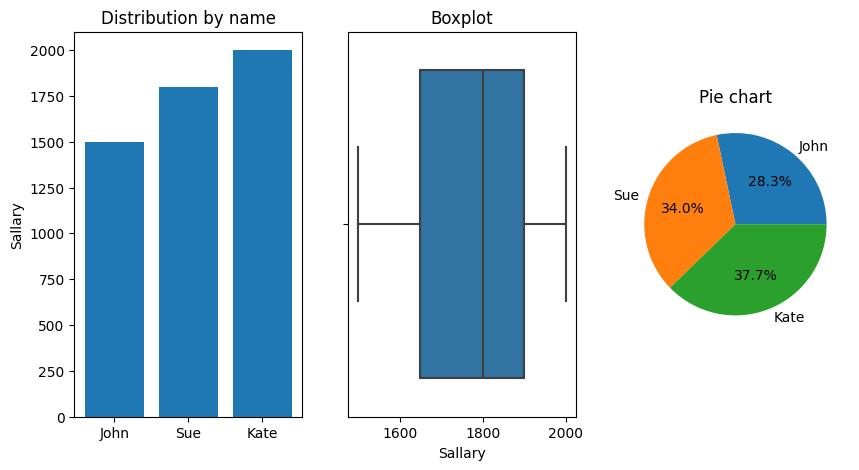

In [19]:
df = pd.DataFrame({
    'name':['John', 'Sue', 'Kate'],
    'sallary':[1500, 1800, 2000]
})
df['sallary_prop'] = df['sallary']/df['sallary'].sum() * 100

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
axes[0].bar(
    x = df['name'],
    height=df['sallary'],
)
axes[0].set_title('Distribution by name')
axes[0].set_ylabel('Sallary')

sns.boxplot(
    data=df,
    x='sallary',
    orient='h',
    ax=axes[1],
)
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Sallary')

axes[2].pie(
    x=df['sallary_prop'],
    labels=df['name'],
    autopct='%.1f%%',
)
axes[2].set_title('Pie chart');
